# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [8]:
pyber_data_df["date_parsed"] = pd.to_datetime(pyber_data_df["date"])

In [9]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   city          2375 non-null   object        
 1   date          2375 non-null   object        
 2   fare          2375 non-null   float64       
 3   ride_id       2375 non-null   int64         
 4   driver_count  2375 non-null   int64         
 5   type          2375 non-null   object        
 6   date_parsed   2375 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 148.4+ KB


In [6]:
pyber_data_df["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [7]:
pyber_data_df.city.value_counts()

West Angela        39
South Karenland    38
North Jason        35
Port Frank         33
Liumouth           33
                   ..
Randallchester      5
Penaborough         5
South Saramouth     4
Newtonview          4
Garzaport           3
Name: city, Length: 120, dtype: int64

## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [22]:
#  1. Get the total rides for each city type
rides = pyber_data_df.groupby("type").size()
rides

type
Rural        125
Suburban     625
Urban       1625
dtype: int64

In [17]:
pyber_data_df.loc[:, ["city", "type", "driver_count"]].drop_duplicates().groupby("type").driver_count.sum()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [23]:
# 2. Get the total drivers for each city type
drivers = city_data_df.groupby("type").driver_count.sum()
drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [24]:
#  3. Get the total amount of fares for each city type
fares = pyber_data_df.groupby("type").fare.sum()
fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [25]:
#  4. Get the average fare per ride for each city type. 
fare_avg = pyber_data_df.groupby("type").fare.mean()
fare_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [27]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = fares / drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [30]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([rides, drivers, fares, fare_avg, avg_fare_driver], axis=1)
pyber_summary_df

,0,driver_count,fare,fare,1
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [31]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [32]:
#  8. Format the columns.
pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [34]:
pyber_data_df.groupby("type").agg({"ride_id":"count", "fare":["sum", "mean"]})

ride_id      fare           
           count       sum       mean
type                                 
Rural        125   4327.93  34.623440
Suburban     625  19356.33  30.970128
Urban       1625  39854.38  24.525772

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [35]:
# Print the merged DataFrame for reference.
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type,date_parsed
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14 10:14:22
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04 18:24:09
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24 04:29:00
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10 23:22:03
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06 04:28:35


In [36]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type,date_parsed
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14 10:14:22
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04 18:24:09
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24 04:29:00
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10 23:22:03
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06 04:28:35
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,2019-04-29 17:04:39
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,2019-01-30 00:05:47
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,2019-02-10 21:03:50
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,2019-05-07 19:22:15


In [38]:
pyber_data_df["date_p"] = [x.date() for x in pyber_data_df.date_parsed]
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type,date_parsed,date_p
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14 10:14:22,2019-01-14
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04 18:24:09,2019-03-04
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24 04:29:00,2019-02-24
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10 23:22:03,2019-02-10
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06 04:28:35,2019-03-06


In [56]:
ha = pyber_data_df.groupby(["date_p","type"]).fare.sum().reset_index()
ha

,date_p,type,fare
0,2019-01-01,Rural,43.69
1,2019-01-01,Suburban,128.52
2,2019-01-01,Urban,127.78
3,2019-01-02,Rural,52.12
4,2019-01-02,Suburban,274.92
...,...,...,...
329,2019-05-06,Urban,181.20
330,2019-05-07,Rural,44.94
331,2019-05-07,Suburban,274.09
332,2019-05-07,Urban,258.01


In [55]:
import seaborn as sns

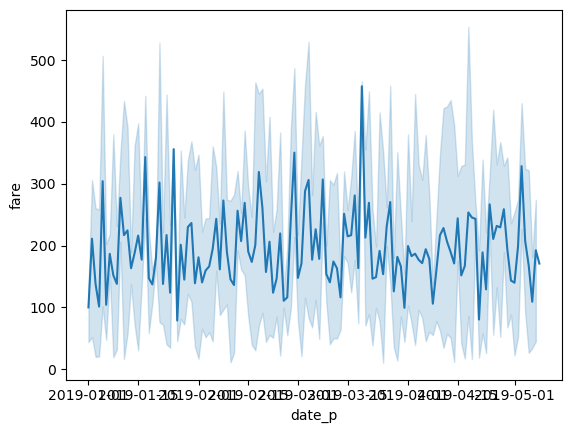

In [59]:
sns.lineplot(data=ha, x="date_p", y="fare")
plt.show()

In [50]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df2 = pyber_data_df.groupby(["date", "type"]).fare.sum()
df2 = pd.DataFrame(df2)
df2

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [51]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df2.reset_index(inplace=True)
df2

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [53]:
df2.columns

Index(['date', 'type', 'fare'], dtype='object')

In [54]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df2.pivot(index='date', columns='type', values='fare')

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [ ]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.



In [ ]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

In [ ]:
# 6. Check that the datatype for the index is datetime using df.info()


In [ ]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

